## Dataset
* https://www.kaggle.com/c/titanic/data

## Problem Defination
* Trying to predict if the passenger survive the Titanic disaster or not

In [50]:
#lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

#import cufflinks as cf
#cf.go_offline()

In [2]:
#loading the data
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### checking the missing values

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#there are missing values in [Age][Cabin] and [Embarked] column

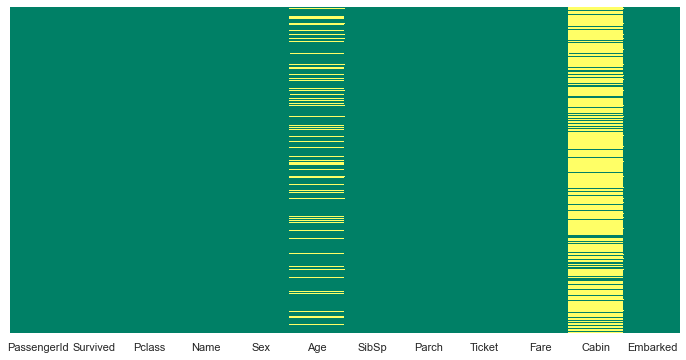

In [16]:
#visualizing it
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='summer');
#all the yellow line are missing values

In [51]:
#checking the average age by passenger class

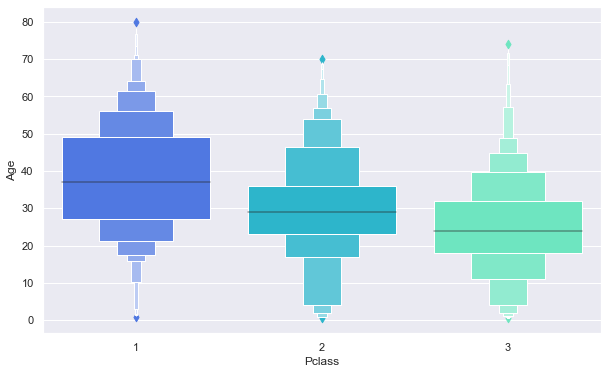

In [52]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Pclass',y='Age',data=data);

In [53]:
#first class people has average age = 30 to 40
#second class people has average age = 25 to 35 and so on ...

In [59]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return round(np.mean(data['Age'][data['Pclass']==1]))
        
        elif pclass == 2:
            return round(np.mean(data['Age'][data['Pclass']==2]))
        else:
            return round(np.mean(data['Age'][data['Pclass']==3]))
    else:
        return age

In [60]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [62]:
data['Age'].isnull().sum() #no more missing age values

0

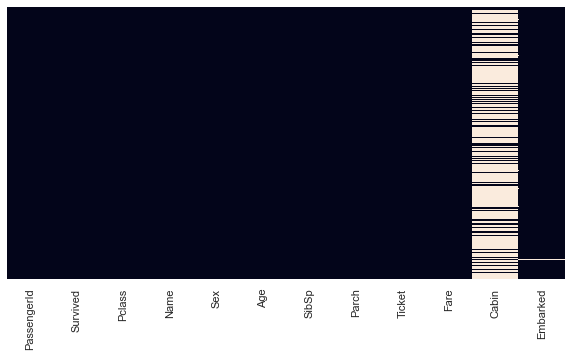

In [64]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False);

In [65]:
#missing values in Cabin and Embarked column

In [66]:
#dropping the cabin column
data = data.drop('Cabin',axis=1)

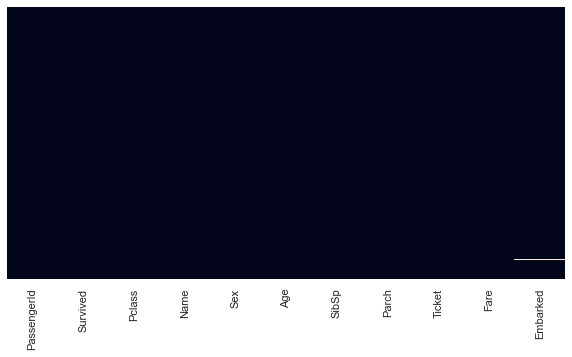

In [67]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False);

In [68]:
#dropping rest of the missing values

In [69]:
data.dropna(inplace=True)

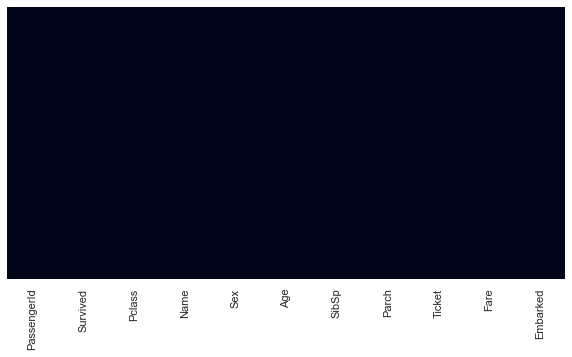

In [70]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False);

#### Checking the target column (Survived)

In [71]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

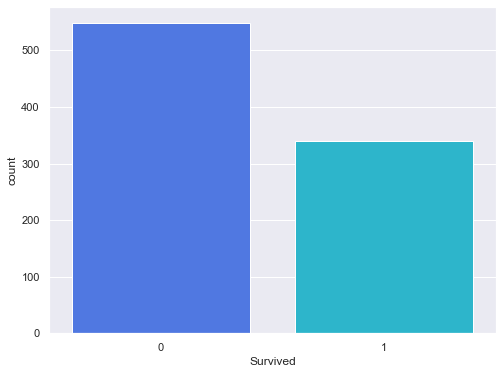

In [72]:
#visualize it
plt.figure(figsize=(8,6));
sns.countplot(x='Survived',data=data);

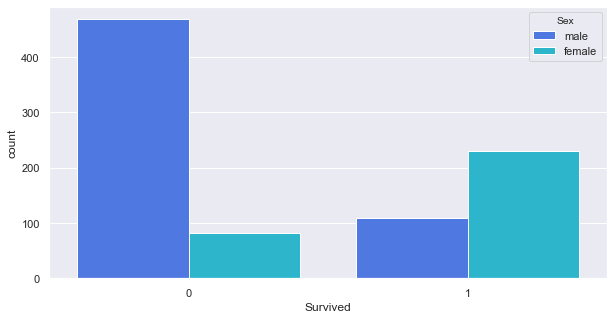

In [73]:
#checking the male and female ratio of survived
plt.figure(figsize=(10,5));
sns.countplot(x='Survived',hue='Sex',data=data);

In [74]:
data['Sex'][data['Survived']==1].value_counts() #all survived male and female

female    231
male      109
Name: Sex, dtype: int64

In [75]:
data['Sex'][data['Survived']==0].value_counts() #all not survived male and female

male      468
female     81
Name: Sex, dtype: int64

In [76]:
#### Visualize the survived column with passenger

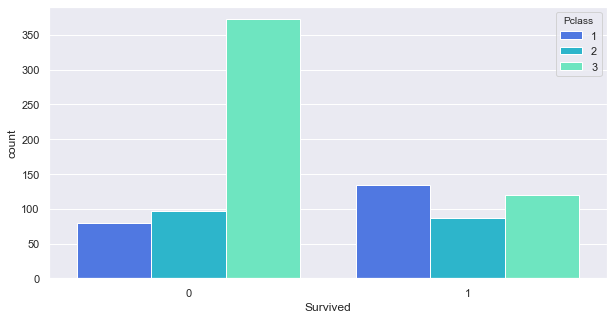

In [77]:
plt.figure(figsize=(10,5));
sns.countplot(x='Survived',hue='Pclass',data=data);

In [78]:
## Checking the distribution of age column

In [79]:
data['Age'].value_counts()

25.00    159
38.00     40
30.00     36
24.00     30
22.00     27
        ... 
36.50      1
66.00      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

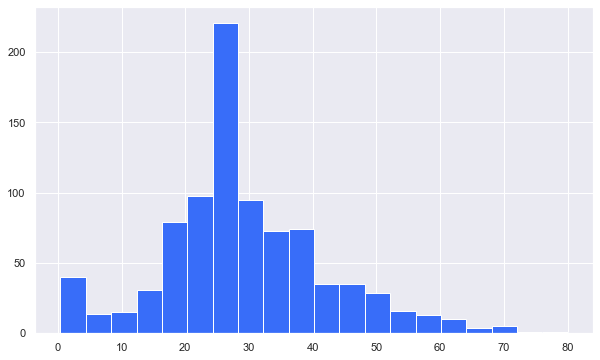

In [80]:
#visualize it
plt.figure(figsize=(10,6))
data['Age'].hist(bins=20);
#sns.distplot(data['Age'].dropna(),kde=False,bins=20);

In [81]:
#checking siblings and parents

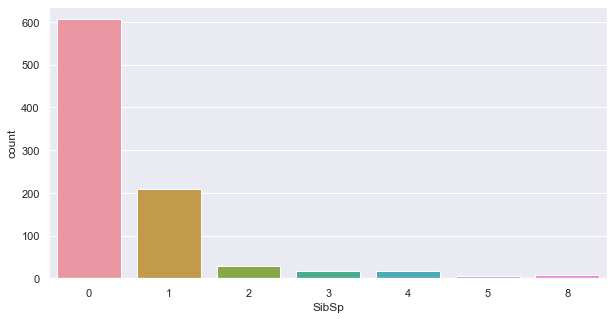

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',data=data);

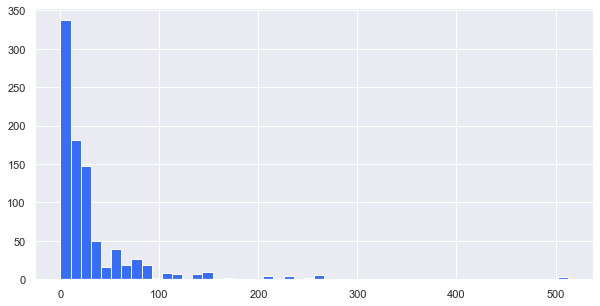

In [83]:
#checking the Fare column
data['Fare'].hist(bins=50,figsize=(10,5));

In [84]:
data['Fare'].max()

512.3292

In [85]:
data['Fare'].min()

0.0

### Converting category to numeric

In [87]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [91]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [94]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)

#### Concat

In [95]:
data = pd.concat([data,sex,embark],axis=1)

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Dropping unnecessary column

In [97]:
data.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [98]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [99]:
data.drop('PassengerId',axis=1,inplace=True)

In [100]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [107]:
data.rename(columns={'male':'Sex'}, inplace=True)

In [108]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [109]:
data.to_csv('clean_data.csv',index=False)